Data available at : https://github.com/LianHaiMiao/Attentive-Group-Recommendation 

# **Data Exploration**

In [1]:
import scipy.sparse as sp
import numpy as np

In [2]:
class Config(object):
  def __init__(self):
    self.data_path='/content/'

In [3]:

class Dataset(object):
  def __init__ (self, data_path)  :
        
        print("loading User Train Matrix...")
        self.user_trainMatrix=self.load_rating_file_as_matrix(data_path+"userRatingTrain.txt")
        print("loading Group Train Matrix...")
        self.group_trainMatrix=self.load_rating_file_as_matrix(data_path+"groupRatingTrain.txt")
        print("loading User Test Matrix...")
        self.user_testMatrix=self.load_rating_file_as_matrix(data_path+"userRatingTest.txt")
        print("loading Group Test Matrix...")
        self.group_testMatrix=self.load_rating_file_as_matrix(data_path+"groupRatingTest.txt")
        
        # process negative data
        #print("loading User Negative into User test Matrix:")
        #self.user_testMatrix=self.load_negative_data(self.user_testMatrix, data_path+"userRatingNegative.txt")
        
        #taken num items as per train data since they are different in test matrices from train matrice item counts
        self.num_users, self.num_items = self.user_trainMatrix.shape
        self.num_groups=self.group_trainMatrix.shape[0]

        #implicit matrices
        self.implicit_user_trainMatrix=np.zeros((self.user_trainMatrix.shape))
        self.implicit_user_testMatrix=np.zeros((self.user_testMatrix.shape))
        self.implicit_group_trainMatrix=np.zeros((self.group_trainMatrix.shape))
        self.implicit_group_testMatrix=np.zeros((self.group_testMatrix.shape))

        print("loading Implicit User Train Matrix...")
        self.implicit_user_trainMatrix[self.user_trainMatrix!=0]=1
        print("loading Implicit User Test Matrix...")
        self.implicit_user_testMatrix[self.user_testMatrix!=0]=1
        print("loading Implicit Group Train Matrix...")
        self.implicit_group_trainMatrix[self.group_trainMatrix!=0]=1
        print("loading Implicit Group Test Matrix...")
        self.implicit_group_testMatrix[self.group_testMatrix!=0]=1

        #group-user mapping
        print("loading Group-User Mapping Data...")
        self.group_user_Dict=self.extract_group_user_data(data_path+"groupMember.txt")

  def extract_group_user_data(self, filename):
        group_user_dict={}
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                arr[1] = arr[1].replace("\n", "")
                members=arr[1].split(",")
                if arr[0] not in group_user_dict:
                    group_user_dict[int(arr[0])]= [int(x) for x in members]
                line=f.readline()
        return group_user_dict

  def load_rating_file_as_matrix(self, filename):
        # Get number of users and items
        num_users, num_items = 0, 0
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                u,i=int(arr[0]), int(arr[1])
                num_users=max(num_users,u)
                num_items=max(num_items,i)
                line=f.readline()
      
        mat=np.zeros((num_users+1, num_items+1))
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                mat[int(arr[0])-1][int(arr[1])-1]=int(arr[2])
                line=f.readline()

        return mat

  #TBD
  def load_negative_data(self, matrixname, filename):
        with open(filename, "r") as f:
            line=f.readline()
            while line!=None and line!="":
                arr=line.split(" ")
                print(arr)
                line=f.readline()



In [4]:
if __name__=='__main__':
  config=Config()
  dataset=Dataset(config.data_path)
  num_users, num_items, num_groups = dataset.num_users, dataset.num_items, dataset.num_groups



loading User Train Matrix...
loading Group Train Matrix...
loading User Test Matrix...
loading Group Test Matrix...
loading Implicit User Train Matrix...
loading Implicit User Test Matrix...
loading Implicit Group Train Matrix...
loading Implicit Group Test Matrix...
loading Group-User Mapping Data...


**Dataset Details:**

In [5]:
print("num users, num items, num groups=({}, {}, {})".format(num_users, num_items, num_groups))
print()
print("user_traindata shape={}".format(dataset.user_trainMatrix.shape))
print("user_testdata shape={}".format(dataset.user_testMatrix.shape))
print("group_traindata shape={}".format(dataset.group_trainMatrix.shape))
print("group_testdata shape={}".format(dataset.group_testMatrix.shape))
print()
print("Implicit user_traindata shape={}".format( dataset.implicit_user_trainMatrix.shape))
print("implicit user_testdata shape={}".format(  dataset.implicit_user_testMatrix.shape))
print("implicit group_traindata shape={}".format(dataset.implicit_group_trainMatrix.shape))
print("implicit group_testdata shape={}".format( dataset.implicit_group_testMatrix.shape))
print()
print('Group User Data:')
print(dataset.group_user_Dict)

num users, num items, num groups=(602, 7710, 290)

user_traindata shape=(602, 7710)
user_testdata shape=(602, 7679)
group_traindata shape=(290, 7710)
group_testdata shape=(290, 7656)

Implicit user_traindata shape=(602, 7710)
implicit user_testdata shape=(602, 7679)
implicit group_traindata shape=(290, 7710)
implicit group_testdata shape=(290, 7656)

Group User Data:
{216: [346, 414], 217: [433, 526], 214: [559, 570], 215: [226, 294], 212: [415, 470], 213: [43, 267, 308], 210: [443, 520], 211: [53, 392], 165: [451, 496], 264: [105, 171], 265: [556, 253, 366], 218: [334, 386], 219: [199, 302], 133: [6, 126], 132: [141, 519], 131: [480, 500], 130: [179, 348], 137: [106, 524], 136: [304, 587], 135: [42, 510], 134: [113, 120], 139: [440, 545], 138: [365, 490], 166: [258, 397], 24: [27, 404], 25: [58, 252], 26: [157, 565, 431], 27: [347, 462], 20: [8, 435], 21: [152, 484], 22: [271, 502], 23: [155, 381], 160: [391, 405], 28: [597, 521], 29: [23, 523], 161: [210, 486], 289: [61, 475], 0: [21

**NOTE: Need to check :**



1.   Why is test data's item counts different from train data's
2.   Plan how to incorporate and make use of negative data wrt to each item and each user/group




# **Module Function Scripts**

**A. Gartrell, M., Xing, X., Lv, Q., Beach, A., Han, R., Mishra, S., & Seada, K. (2010, November). Enhancing group recommendation by incorporating social relationship interactions. In Proceedings of the 16th ACM international conference on Supporting group work (pp. 97-106).**

***1. Social Relationship***

***Point to ne noted***: Since we dont have personal relationship data, we have taken the similarity based on what kinds of items are preffered to be viwed by two users based on any factor (eg poster of movies, directors, movie genre etc) Whethert they like the item or not comes after that, but the common items denote preference based on some factor which led the users to at least view the same items so that they could rate the item

In [6]:
similarity_in_group=np.zeros(num_groups)

for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  sum_of_weight_similarities=0
  
  
  for i in range(len(group_members)):
    for j in range(i+1,len(group_members)):
      user1=group_members[i]
      user2=group_members[j]
      if user1 != user2:
        w_ij=0
        user1_items=np.nonzero(dataset.user_trainMatrix[user1])[0]
        user2_items=np.nonzero(dataset.user_trainMatrix[user2])[0]
        common_items = set(user1_items).intersection(user2_items)
        num_common_items = len(common_items)
        total_items = set(user1_items).union(user2_items)
        num_total_items = len(total_items)

        w_ij=num_common_items/num_total_items
        sum_of_weight_similarities+=w_ij
  similarity_in_group[group_id]=(2*sum_of_weight_similarities)/(len(group_members)*(len(group_members)-1))

#print(similarity_in_group)   

In [7]:
social_descriptor_groupwise=np.zeros(num_groups)
sorted_values = sorted(similarity_in_group)

# Compute the statistical thresholds for each category (since we dont have very strong similarities in any group)
q1 = sorted_values[int(len(sorted_values) * 0.33)]
q2 = sorted_values[int(len(sorted_values) * 0.67)]


#print(q1,",",q2)

for i in range(num_groups):
        if similarity_in_group[i] <= q1:
            social_descriptor_groupwise[i]=0
        elif similarity_in_group[i] <= q2:
            social_descriptor_groupwise[i]=1
        else:
            social_descriptor_groupwise[i]=2
    
#print(social_descriptor_groupwise)




***2. Expertise descriptor***

In [8]:
#calculate absolute user expertise
user_expertise=np.zeros(num_users)
x=0
for user_data in dataset.user_trainMatrix:
    #print(user_data)
    user_i_item_count=len(np.nonzero(user_data)[0])
    #print(user_i_item_count)
    user_expertise[x]=user_i_item_count/num_items
    x+=1

#print(user_expertise)
absolute_user_expertise_levels=np.zeros(num_users)
sorted_expertise_values = sorted(user_expertise)

# Compute the statistical thresholds for each category (since we dont have very strong similarities in any group)
q1 = sorted_expertise_values[int(len(sorted_expertise_values) * 0.2)]
q2 = sorted_expertise_values[int(len(sorted_expertise_values) * 0.4)]
q3 = sorted_expertise_values[int(len(sorted_expertise_values) * 0.6)]
q4 = sorted_expertise_values[int(len(sorted_expertise_values) * 0.8)]

#print(q1,",",q2,",",q3,",",q4)

for i in range(num_users):
        if user_expertise[i] <= q1:
            absolute_user_expertise_levels[i]=1
        elif user_expertise[i] <= q2:
            absolute_user_expertise_levels[i]=2
        elif user_expertise[i] <= q3:
            absolute_user_expertise_levels[i]=3
        elif user_expertise[i] <= q4:
            absolute_user_expertise_levels[i]=4
        else:
            absolute_user_expertise_levels[i]=5
    
#print(absolute_user_expertise_levels)


In [9]:
#uncomment this line for 2d sparse matrix
expertise_in_group_members_mat=np.zeros((num_groups, num_users))
#uncomment this line for dictionary of list(of dicts)
#expertise_in_group_members_dict={}

for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  
  sum_of_expertise_in_group=0 
  for user in group_members:
      sum_of_expertise_in_group+=absolute_user_expertise_levels[user]
  list_of_member_expertise_groupwise=[] 
  for user in group_members:
      user_relative_expertise_pair={}
      E_j=absolute_user_expertise_levels[user]/sum_of_expertise_in_group
      user_relative_expertise_pair[user]=E_j

      #uncomment this line for 2d sparse matrix
      expertise_in_group_members_mat[group_id][user]=E_j
      #uncomment this two lines for dictionary of list(of dicts)
      #list_of_member_expertise_groupwise.append(user_relative_expertise_pair)
  #expertise_in_group_members_dict[group_id]=list_of_member_expertise_groupwise

#print(expertise_in_group_members_mat[1])


**WITHOUT EXPERTISE DESCRIPTOR**


In [10]:
expertise_in_group_members_mat=np.ones((num_groups, num_users))

***3. Dissimilarity descriptors***

**For Explicit Rating- taking rating of items into consideration**

---



**For Implicit Rating**

---



a. Dis_1: APD(Average Pairwise Dissimilarity)

In [11]:
#explicit APD

APD_mat=np.zeros((num_groups, num_items))

for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)
  for item in range(num_items):
      sum_rating_deviation=0
      sum_rating_deviation = sum(abs(dataset.user_trainMatrix[i][item]-dataset.user_trainMatrix[j][item]) for i in range(num_members) for j in range(i+1, num_members))

      
      APD_mat[group_id][item]=(2*sum_rating_deviation)/(num_members*(num_members-1))

#print(APD_mat)




In [12]:
#implicit APD

APD_mat_implicit=np.zeros((num_groups, num_items))

for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)
  for item in range(num_items):
      sum_rating_deviation=0
      sum_rating_deviation = sum(abs(dataset.implicit_user_trainMatrix[i][item]-dataset.implicit_user_trainMatrix[j][item]) for i in range(num_members) for j in range(i+1, num_members))

      
      APD_mat_implicit[group_id][item]=(2*sum_rating_deviation)/(num_members*(num_members-1))

#print(APD_mat_implicit)

b. Dis_2: VD(Variance Dissimilarity)

In [13]:
#explicit VD

VD_mat=np.zeros((num_groups, num_items))

for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)
  

  for i in range(num_items):
      avg_for_item_groupwise = sum(dataset.user_trainMatrix[group_members[m]][i] for m in range(num_members)) / (num_members)
      sum_rating_deviation_from_avg=0
      for j in range(num_members):
            sum_rating_deviation_from_avg+= (dataset.user_trainMatrix[group_members[j]][i]-avg_for_item_groupwise)**2
      VD_mat[group_id][i]=sum_rating_deviation_from_avg/num_members

#print(VD_mat)

In [14]:
#implicit VD

VD_mat_implicit=np.zeros((num_groups, num_items))

for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)
  

  for i in range(num_items):
      avg_for_item_groupwise = sum(dataset.implicit_user_trainMatrix[group_members[m]][i] for m in range(num_members)) / (num_members)
      sum_rating_deviation_from_avg=0
      for j in range(num_members):
            sum_rating_deviation_from_avg+= (dataset.implicit_user_trainMatrix[group_members[j]][i]-avg_for_item_groupwise)**2
      VD_mat_implicit[group_id][i]=sum_rating_deviation_from_avg/num_members

#print(VD_mat_implicit)

***4. Heuristic group concensus function***

**Explicit rating**

In [15]:
#using Dis_1= APD
w_1=0.8
w_2=0.2

overall_group_item_output_mat_APD=np.zeros((num_groups, num_items))
for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)

  #Ei_Rix=np.zeros((num_members,num_items))
  #x=0
  #for member in group_members:
  #    for item in range(num_items):
  #        Ei_Rix[x][item]=expertise_in_group_members_mat[group_id][member]*dataset.user_trainMatrix[member][item]
  #    x+=1
#
  Ei_Rix = np.array([[expertise_in_group_members_mat[group_id][member] * dataset.user_trainMatrix[member][item] for item in range(num_items)] for member in group_members])


  for item in range(num_items): 
      if social_descriptor_groupwise[group_id]==0:
          overall_group_item_output_mat_APD[group_id][item]= w_1*min(Ei_Rix[:, item].tolist())+w_2*APD_mat[group_id][item] #min_misery
      elif social_descriptor_groupwise[group_id]==1:
          overall_group_item_output_mat_APD[group_id][item]= w_1*(sum(Ei_Rix[:, item].tolist()) / len(Ei_Rix[:, item].tolist()))+w_2*APD_mat[group_id][item] #avg_satisfaction
      elif social_descriptor_groupwise[group_id]==2:
          overall_group_item_output_mat_APD[group_id][item]= w_1*max(Ei_Rix[:, item].tolist())+w_2*APD_mat[group_id][item] #max_satisfaction


#print(overall_group_item_output_mat_APD)

In [16]:
#using Dis_2= VD
w_1=0.8
w_2=0.2

overall_group_item_output_mat_VD=np.zeros((num_groups, num_items))
for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)

  #Ei_Rix=np.zeros((num_members,num_items))
  #x=0
  #for member in group_members:
  #    for item in range(num_items):
  #        Ei_Rix[x][item]=expertise_in_group_members_mat[group_id][member]*dataset.user_trainMatrix[member][item]
  #    x+=1
#
  Ei_Rix = np.array([[expertise_in_group_members_mat[group_id][member] * dataset.user_trainMatrix[member][item] for item in range(num_items)] for member in group_members])


  for item in range(num_items): 
      if social_descriptor_groupwise[group_id]==0:
          overall_group_item_output_mat_VD[group_id][item]= w_1*min(Ei_Rix[:, item].tolist())+w_2*VD_mat[group_id][item] #min_misery
      elif social_descriptor_groupwise[group_id]==1:
          overall_group_item_output_mat_VD[group_id][item]= w_1*(sum(Ei_Rix[:, item].tolist()) / len(Ei_Rix[:, item].tolist()))+w_2*VD_mat[group_id][item] #avg_satisfaction
      elif social_descriptor_groupwise[group_id]==2:
          overall_group_item_output_mat_VD[group_id][item]= w_1*max(Ei_Rix[:, item].tolist())+w_2*VD_mat[group_id][item] #max_satisfaction


#print(overall_group_item_output_mat_VD)

**Implicit rating**

In [17]:
#using Dis_1= APD implicit
w_1=0.8
w_2=0.2

overall_group_item_output_mat_APD_implicit=np.zeros((num_groups, num_items))
for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)

  #Ei_Rix=np.zeros((num_members,num_items))
  #x=0
  #for member in group_members:
  #    for item in range(num_items):
  #        Ei_Rix[x][item]=expertise_in_group_members_mat[group_id][member]*dataset.user_trainMatrix[member][item]
  #    x+=1
#
  Ei_Rix = np.array([[expertise_in_group_members_mat[group_id][member] * dataset.implicit_user_trainMatrix[member][item] for item in range(num_items)] for member in group_members])


  for item in range(num_items): 
      if social_descriptor_groupwise[group_id]==0:
          overall_group_item_output_mat_APD_implicit[group_id][item]= w_1*min(Ei_Rix[:, item].tolist())+w_2*APD_mat_implicit[group_id][item] #min_misery
      elif social_descriptor_groupwise[group_id]==1:
          overall_group_item_output_mat_APD_implicit[group_id][item]= w_1*(sum(Ei_Rix[:, item].tolist()) / len(Ei_Rix[:, item].tolist()))+w_2*APD_mat_implicit[group_id][item] #avg_satisfaction
      elif social_descriptor_groupwise[group_id]==2:
          overall_group_item_output_mat_APD_implicit[group_id][item]= w_1*max(Ei_Rix[:, item].tolist())+w_2*APD_mat_implicit[group_id][item] #max_satisfaction


#print(overall_group_item_output_mat_APD_implicit)

In [18]:
#using Dis_2= VD implicit
w_1=0.8
w_2=0.2

overall_group_item_output_mat_VD_implicit=np.zeros((num_groups, num_items))
for group_id in dataset.group_user_Dict:
  group_members= dataset.group_user_Dict[group_id]
  num_members=len(group_members)

  #Ei_Rix=np.zeros((num_members,num_items))
  #x=0
  #for member in group_members:
  #    for item in range(num_items):
  #        Ei_Rix[x][item]=expertise_in_group_members_mat[group_id][member]*dataset.user_trainMatrix[member][item]
  #    x+=1
#
  Ei_Rix = np.array([[expertise_in_group_members_mat[group_id][member] * dataset.implicit_user_trainMatrix[member][item] for item in range(num_items)] for member in group_members])


  for item in range(num_items): 
      if social_descriptor_groupwise[group_id]==0:
          overall_group_item_output_mat_VD_implicit[group_id][item]= w_1*min(Ei_Rix[:, item].tolist())+w_2*VD_mat_implicit[group_id][item] #min_misery
      elif social_descriptor_groupwise[group_id]==1:
          overall_group_item_output_mat_VD_implicit[group_id][item]= w_1*(sum(Ei_Rix[:, item].tolist()) / len(Ei_Rix[:, item].tolist()))+w_2*VD_mat_implicit[group_id][item] #avg_satisfaction
      elif social_descriptor_groupwise[group_id]==2:
          overall_group_item_output_mat_VD_implicit[group_id][item]= w_1*max(Ei_Rix[:, item].tolist())+w_2*VD_mat_implicit[group_id][item] #max_satisfaction


#print(overall_group_item_output_mat_VD_implicit)

# **Rank top k**

In [19]:
def rank_top_k(group_item_mat, k):
    ranked_top_k=[]
    for group_data in group_item_mat:
        sorted_top_k_groupwise=sorted(range(len(group_data)), key=lambda i: group_data[i], reverse=True)[:k]
        ranked_top_k.append(sorted_top_k_groupwise)

    return ranked_top_k

**Using Social Relationship from point A**

In [20]:
social_relation_output_APD_explicit=rank_top_k(overall_group_item_output_mat_APD, 100)
social_relation_output_VD_explicit=rank_top_k(overall_group_item_output_mat_VD, 100)
social_relation_output_APD_implicit=rank_top_k(overall_group_item_output_mat_APD_implicit, 100)
social_relation_output_VD_implicit=rank_top_k(overall_group_item_output_mat_VD_implicit, 100)

# **Permuted Pipeline creation**

**DISCUSS: How do we create?**
1. Do we generate top 1000 from each algo and take intersection and then output top 50?
2. Do we create top 1000 from first algorithm, reduce no of columns of entire dataset, perform second algorithm to output 900 items, then reduce trainset to those common items and so on.. in the end take top 50?

# **Evaluation**

**DISCUSS:**

1. Should we use group train data as validation set and predict new recommendations for test data?
2. Should we add some weight to training data and perform:
  new recommendation= (W * group_train_data) + ((1-W)* generated recommendation from individual data)

**EXPLICIT RECOMMENDATION PERFORMANCE**

In [86]:
y_pred_APD = sorted(social_relation_output_APD_explicit)
y_pred_VD = sorted(social_relation_output_VD_explicit)
y_true = sorted(rank_top_k(dataset.group_trainMatrix, 100))


**A. NDCG**

In [82]:

from sklearn.metrics import dcg_score, ndcg_score
def ndcg_func(y_true, y_pred):
  ndcg = []
  for i in range(len(y_true)):
      true_row = y_true[i]
      pred_row = y_pred[i]
      dcg = dcg_score([true_row], [pred_row])
      ndcg_row = ndcg_score([true_row], [pred_row])
      ndcg.append(ndcg_row)
  return ndcg
  #print(ndcg)

In [90]:
ndcg_explicit_APD=ndcg_func(y_true, y_pred_APD)
print('ndcg_explicit_APD:')
print(ndcg_explicit_APD)
mean_ndcg_explicit_APD = sum(ndcg_explicit_APD) / len(ndcg_explicit_APD)
print("Mean of ndcg_explicit_APD={}".format(mean_ndcg_explicit_APD))

print()
ndcg_explicit_VD=ndcg_func(y_true, y_pred_VD)
print('ndcg_explicit_VD:')
print(ndcg_explicit_VD)
mean_ndcg_explicit_VD = sum(ndcg_explicit_VD) / len(ndcg_explicit_VD)
print("Mean of ndcg_explicit_VD={}".format(mean_ndcg_explicit_VD))

ndcg_explicit_APD:
[0.837177028776798, 0.8908698245022979, 0.82126999739608, 0.8629791405765146, 0.8110939922048748, 0.7902830108369585, 0.8729570077419148, 0.8328617207992751, 0.8447283350470435, 0.8848229786238953, 0.7871590287455528, 0.7965993726836774, 0.9239083202023625, 0.8334699818158767, 0.8011873165561463, 0.7909734770374215, 0.8327848911821868, 0.818669748676565, 0.8233498544203326, 0.8167274370209612, 0.8267788610795656, 0.8244569493519595, 0.8292599215011016, 0.8395418442118329, 0.7980941159180883, 0.7521496314424722, 0.8768355679309209, 0.7732104617510493, 0.842474266315326, 0.8081546804607764, 0.8056462944665863, 0.7881888977514475, 0.8091627316463239, 0.8282611252493263, 0.8207362794673909, 0.7993135477227754, 0.8936273542369209, 0.7944915268245588, 0.7860043809110845, 0.8869273199439927, 0.7653040161002972, 0.9003517448812701, 0.8292184610264067, 0.8640487388164141, 0.8449643768486074, 0.7616330453318222, 0.8143333906634285, 0.8309160029444133, 0.8574758527116186, 0.936

**B. RMSE**

In [93]:
# Calculate RMSE row-wise
def rmse_2d(arr1, arr2):
    """
    Calculate the root mean squared error (RMSE) row-wise between two 2D arrays.
    """
    # Calculate the mean squared error (MSE) row-wise
    mse=0
    for i in range(len(arr1)):
      mse+=(np.array(arr1[i]) - np.array(arr2[i]))**2
    mse = mse/len(arr1)
    # Calculate the RMSE row-wise
    rmse = np.sqrt(mse)
    return rmse

def rmse_func(y_true, y_pred_top_k_indices, y_pred_total):
  k=len(y_pred_top_k_indices[0])
  rmse_total=[]
  for group_id in range(len(y_pred_top_k_indices)):
      y_true_list=[]
      y_pred_list=[]
      for item_id in y_pred_top_k_indices[group_id]:
          y_true_list.append(y_true[group_id][item_id])
          y_pred_list.append(y_pred_total[group_id][item_id])
      rmse_row=rmse_2d(y_true_list, y_pred_list)
      rmse_total.append(rmse_row)
  return rmse_total
  #print(rmse_total)

In [94]:
rmse_explicit_APD=rmse_func(dataset.group_trainMatrix, social_relation_output_APD_explicit, overall_group_item_output_mat_APD)
print('rmse_explicit_APD:')
print(rmse_explicit_APD)
mean_rmse_explicit_APD = sum(rmse_explicit_APD) / len(rmse_explicit_APD)
print("Mean of rmse_explicit_APD={}".format(mean_rmse_explicit_APD))

print()
rmse_explicit_VD=rmse_func(dataset.group_trainMatrix, social_relation_output_VD_explicit, overall_group_item_output_mat_VD)
print('rmse_explicit_VD:')
print(rmse_explicit_VD)
mean_rmse_explicit_VD = sum(rmse_explicit_VD) / len(rmse_explicit_VD)
print("Mean of rmse_explicit_VD={}".format(mean_rmse_explicit_VD))

rmse_explicit_APD:
[34.62571298904905, 43.9597543214245, 37.75248336202534, 40.02549187705255, 29.22892403082946, 53.843383994693355, 59.99208281098432, 31.037396798056374, 40.35740328613822, 49.3495694003504, 57.683359818928714, 51.07230169083825, 37.70490684247874, 37.997309846297746, 59.485460408405686, 36.326161371661605, 68.27261530071921, 40.09675797368161, 41.759430072739256, 51.85624359708289, 36.264721148796944, 38.37798848298331, 55.17952518824351, 67.12473463634697, 50.976268988618614, 34.38560745428238, 49.304743968281365, 66.04415189855949, 32.65593361090753, 34.66453519088349, 40.91747792814215, 64.1577829348171, 49.642119213426014, 55.658781876717356, 40.8306257605734, 43.48792935976603, 41.81267750336015, 41.401570018539154, 42.562307268286105, 45.93353894487121, 37.62552325217551, 41.227296782592965, 56.43536125515632, 27.665501983517306, 54.68811571081966, 39.18609447240181, 33.893952262903774, 65.82112123019479, 57.298865608317236, 45.59232391532592, 45.1382321319743

**IMPLICIT RECOMMENDATION PERFORMANCE**

In [29]:
y_pred_implicit_APD=social_relation_output_APD_implicit

In [31]:
#k=100
Recall_at_k=np.zeros(num_groups)
Precision_at_k=np.zeros(num_groups)
for group_id in range(len(y_pred_implicit_APD)):
    TP=0
    TP_FP=0
    TP_FN=np.sum(dataset.implicit_group_trainMatrix[group_id], axis=0)

    for item_id in social_relation_output_APD_implicit[group_id]:
        if dataset.implicit_group_trainMatrix[group_id][item_id]==1:
            TP+=1
            TP_FP+=1
        else:
            TP_FP+=1
    Precision_at_k[group_id]=(TP/TP_FP)
    if TP_FN!=0:
        Recall_at_k[group_id]=(TP/TP_FN)

In [32]:
print(Precision_at_k)
print(Recall_at_k)

[0.14 0.52 0.42 0.53 0.17 0.44 0.5  0.21 0.59 0.51 0.55 0.64 0.64 0.53
 0.35 0.58 0.46 0.18 0.64 0.58 0.59 0.74 0.49 0.49 0.5  0.62 0.67 0.41
 0.16 0.66 0.55 0.54 0.48 0.43 0.74 0.72 0.49 0.49 0.46 0.76 0.42 0.45
 0.22 0.13 0.52 0.18 0.73 0.4  0.45 0.7  0.67 0.09 0.4  0.42 0.74 0.52
 0.5  0.64 0.55 0.17 0.58 0.35 0.46 0.13 0.28 0.35 0.21 0.24 0.34 0.77
 0.49 0.46 0.28 0.63 0.24 0.38 0.64 0.37 0.42 0.46 0.6  0.47 0.27 0.46
 0.6  0.42 0.47 0.42 0.45 0.16 0.12 0.63 0.61 0.17 0.64 0.13 0.12 0.24
 0.31 0.34 0.54 0.66 0.15 0.31 0.38 0.19 0.23 0.71 0.64 0.47 0.32 0.2
 0.73 0.75 0.5  0.69 0.32 0.37 0.68 0.72 0.7  0.22 0.67 0.5  0.16 0.3
 0.26 0.31 0.38 0.32 0.7  0.22 0.44 0.44 0.72 0.21 0.55 0.39 0.19 0.62
 0.3  0.69 0.55 0.15 0.44 0.19 0.46 0.14 0.29 0.35 0.42 0.5  0.28 0.47
 0.16 0.61 0.3  0.84 0.81 0.52 0.24 0.23 0.5  0.33 0.7  0.69 0.43 0.23
 0.35 0.44 0.34 0.25 0.09 0.55 0.34 0.15 0.32 0.49 0.31 0.18 0.52 0.21
 0.18 0.12 0.16 0.43 0.31 0.18 0.67 0.41 0.65 0.18 0.06 0.05 0.04 0.32
 0.64 0.

# **Analysis**

**EXPLICIT RECOMMENDATION TECHNIQUES**

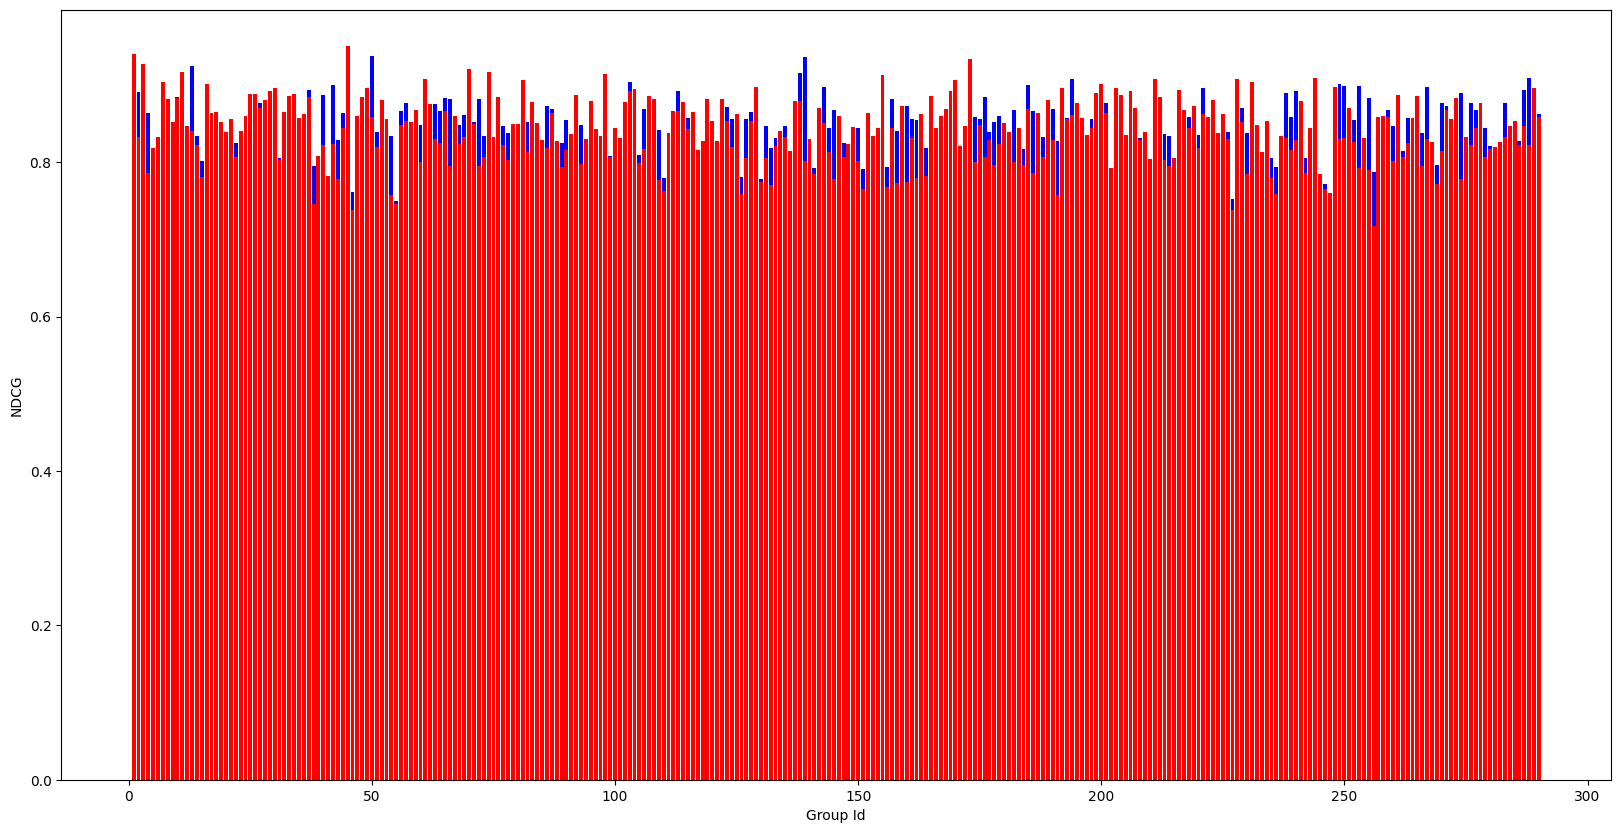

In [88]:
#plot ndcg
import matplotlib.pyplot as plt
  

# corresponding x axis values
x = list(range(1, num_groups+1))

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Group Id')
ax.set_ylabel('NDCG')
#ax.plot(x, Precision_at_k, color='blue')
ax.bar(x, ndcg_explicit_APD, color='blue')
ax.bar(x, ndcg_explicit_VD, color='red')
# function to show the plot
plt.show()


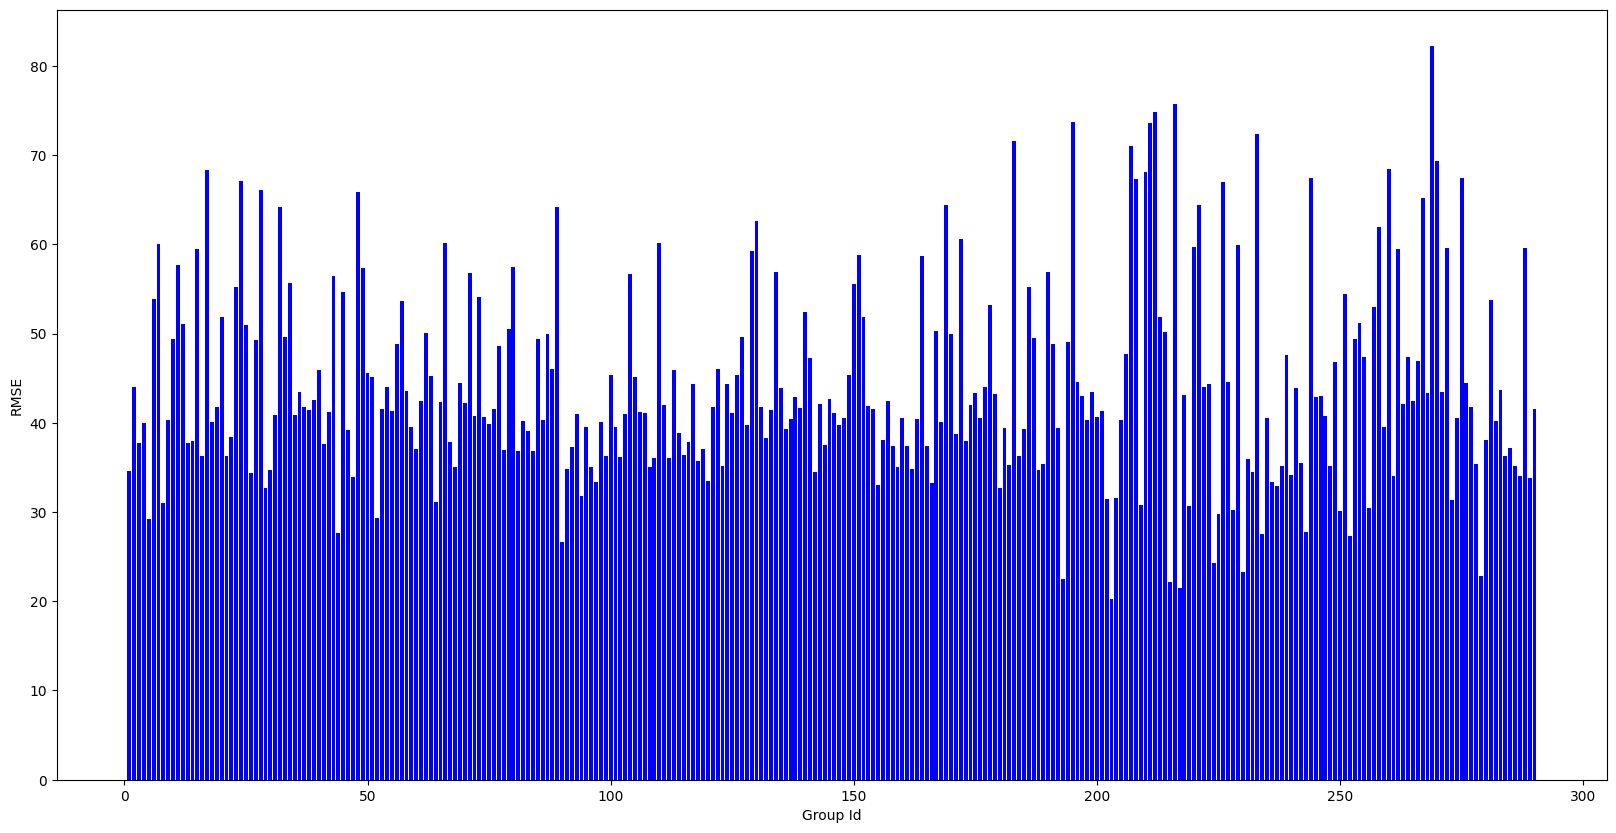

In [76]:
#plot ndcg
import matplotlib.pyplot as plt
  

# corresponding x axis values
x = list(range(1, num_groups+1))

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Group Id')
ax.set_ylabel('RMSE')
#ax.plot(x, Precision_at_k, color='blue')
ax.bar(x, rmse_total, color='blue')
# function to show the plot
plt.show()

**IMPLICIT RECOMMENDATION ANALYSIS**


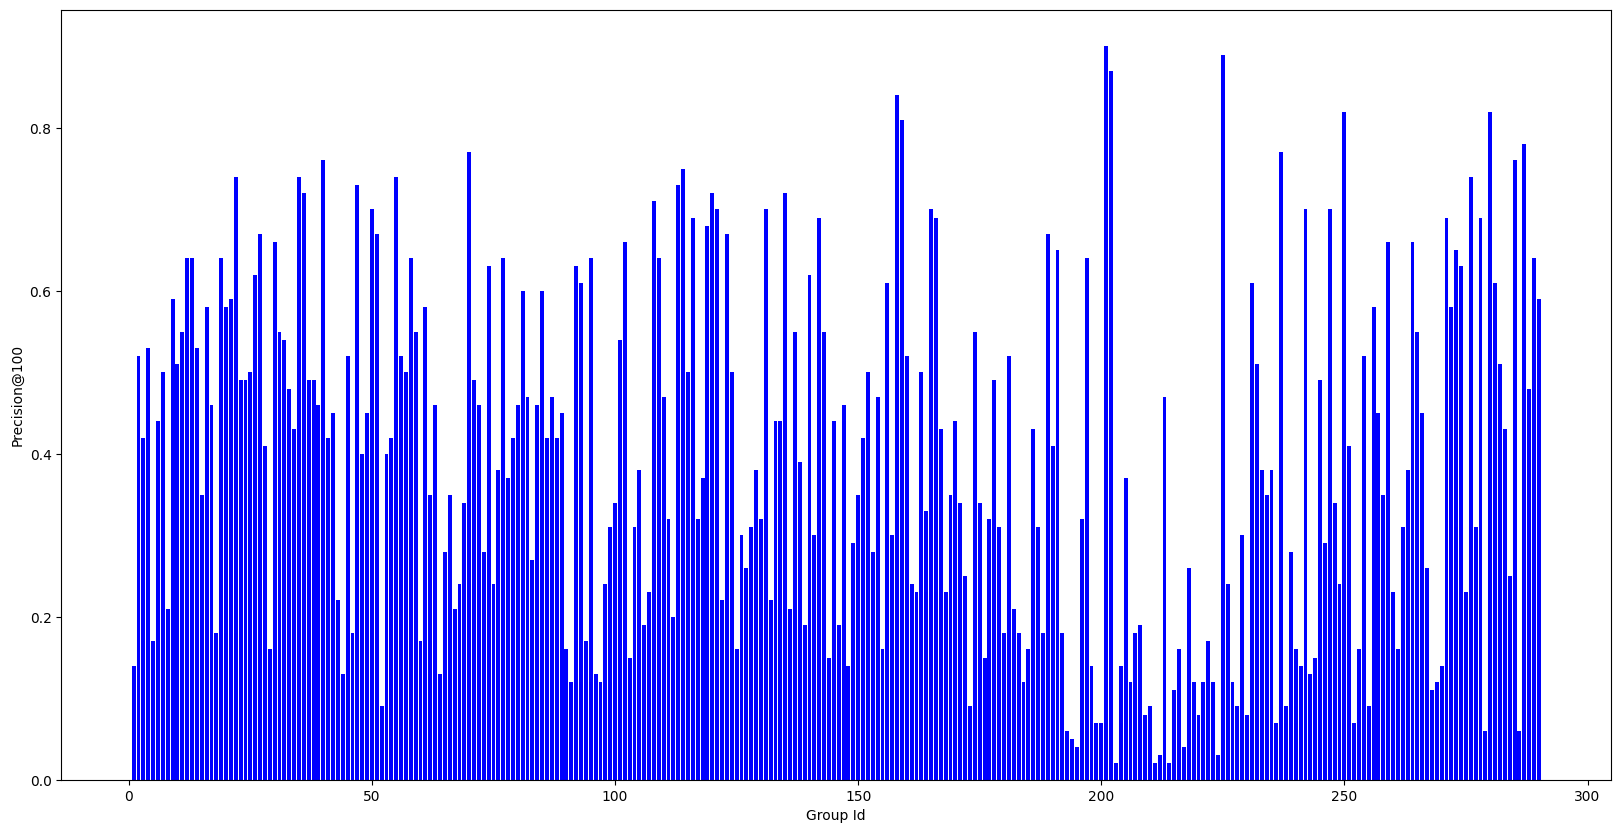

In [57]:
import matplotlib.pyplot as plt
  

# corresponding x axis values
x = list(range(1, num_groups+1))

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Group Id')
ax.set_ylabel('Precision@100')
#ax.plot(x, Precision_at_k, color='blue')
ax.bar(x, Precision_at_k, color='blue')
# function to show the plot
plt.show()

  


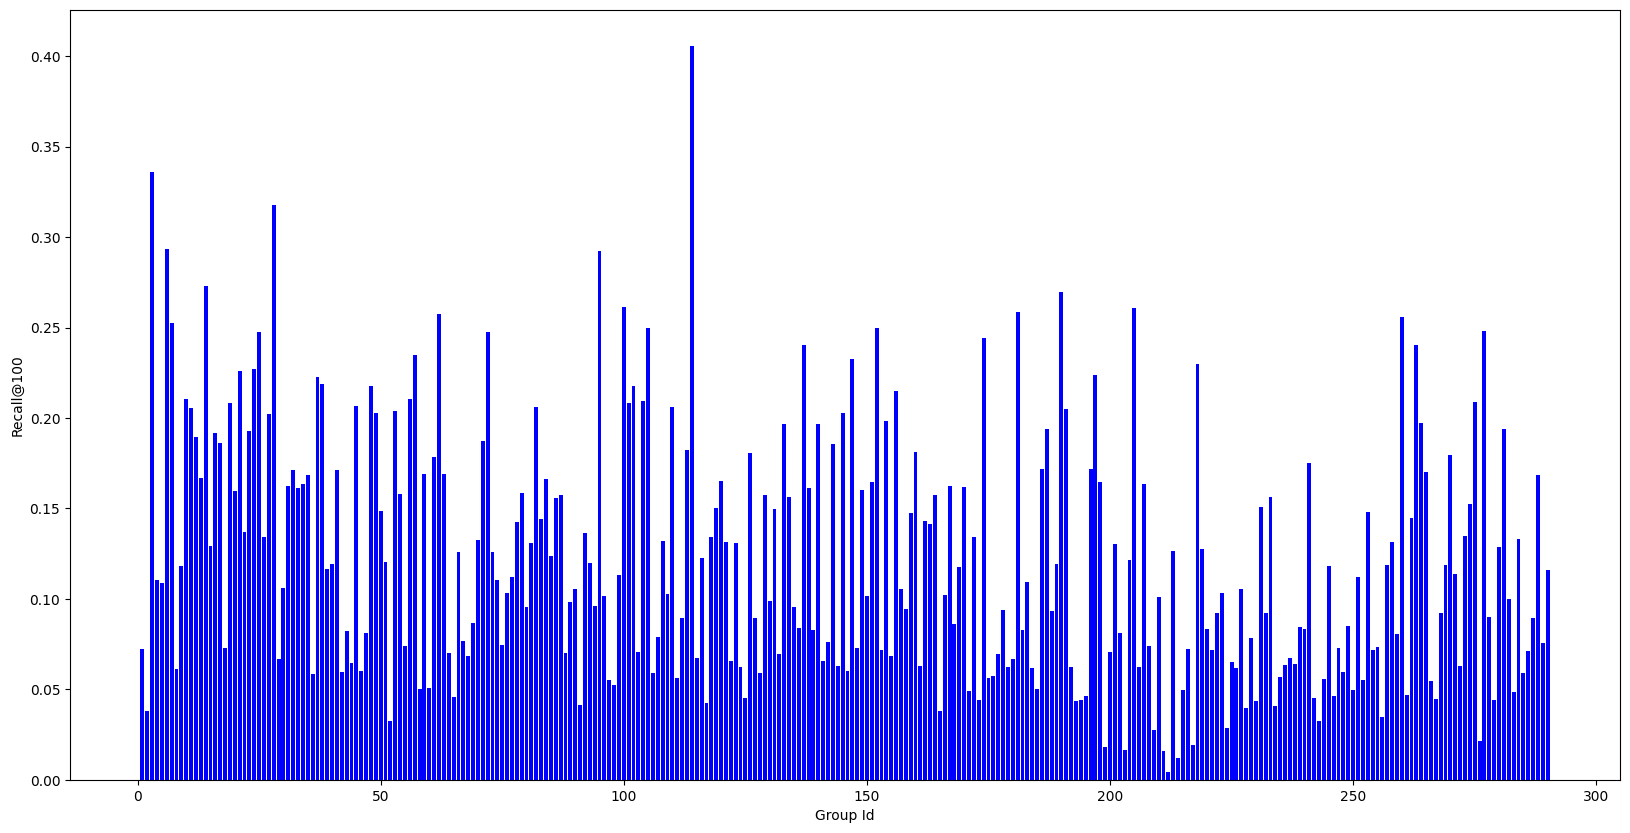

In [58]:

# corresponding x axis values
x = list(range(1, num_groups+1))

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig = plt.figure(figsize=(20, 10))
ax2 = fig.add_subplot(1, 1, 1)
ax2.set_xlabel('Group Id')
ax2.set_ylabel('Recall@100')
ax2.bar(x, Recall_at_k, color='blue')
plt.show()

## **COMPARISON**

# *a. EXPLICIT RECOMMENDATION*

\begin{array}{|c|c|c|c|c|} \hline
Social Relationship & Expertise Descriptor & Dissimilarity Descriptor & NDCG &RMSE \\ \hline
yes & yes & APD & 83.57\% & 44.20\\ \hline
yes & yes & VD & 84.09\% & 376.02\\ \hline
foo & bar & foo & bar & 1  \\ \hline
\end{array}


# *b. IMPLICIT RECOMMENDATION*

**Assumption:** 

1.   K=100



\begin{array}{|c|c|c|c|c|} \hline
Social Relationship & Expertise Descriptor & Dissimilarity Descriptor &Precision@K & Recall@K \\ \hline
yes & yes & APD & 1 & 1\\ \hline
yes & yes & VD & 1 & 1\\ \hline
foo & bar & foo & bar & 1  \\ \hline
\end{array}
